# Cryptocurrency Volatility Prediction Using Machine Learning

**Name:** Sameer  
**Project Type:** Machine Learning  
**Deployment:** Streamlit


## Problem Statement
Cryptocurrency markets are highly volatile. The objective of this project
is to predict volatility using historical market data such as OHLC prices,
trading volume, and market capitalization.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib


In [9]:
df = pd.read_csv("dataset.csv")




# remove unwanted column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df['date'] = pd.to_datetime(df['date'])
df = df.ffill()

df.head()


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['open','high','low','close','volume','marketCap']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()



,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0.001671,0.000732,0.001612,0.001715,0.0,0.001011,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,0.000052,0.000023,0.000050,0.000053,0.0,0.000049,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,0.001717,0.000769,0.001605,0.001662,0.0,0.000980,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,0.000053,0.000023,0.000047,0.000050,0.0,0.000046,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,0.001662,0.000699,0.001470,0.001650,0.0,0.000973,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [11]:
import numpy as np

# avoid division by zero
df['close'] = df['close'].replace(0, 1e-8)
df['marketCap'] = df['marketCap'].replace(0, 1e-8)

# target variable
df['volatility'] = (df['high'] - df['low']) / df['close']

# rolling features
df['rolling_volatility_7'] = df['volatility'].rolling(7).mean()
df['ma_7'] = df['close'].rolling(7).mean()
df['ma_14'] = df['close'].rolling(14).mean()

# liquidity ratio
df['liquidity_ratio'] = df['volume'] / df['marketCap']

# clean infinities
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df.head()


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,volatility,rolling_volatility_7,ma_7,ma_14,liquidity_ratio
13,0.000051,0.000021,0.000050,0.000050,0.0,0.000046,2013-05-11T23:59:59.999Z,Litecoin,2013-05-11,-0.569123,-0.558516,0.000991,0.000869,0.0
14,0.000050,0.000021,0.000048,0.000048,0.0,0.000045,2013-05-12T23:59:59.999Z,Litecoin,2013-05-12,-0.563949,-0.559587,0.000758,0.000750,0.0
15,0.001712,0.000724,0.001707,0.001702,0.0,0.001006,2013-05-12T23:59:59.999Z,Bitcoin,2013-05-12,-0.577371,-0.561945,0.000994,0.000868,0.0
16,0.000048,0.000021,0.000048,0.000049,0.0,0.000045,2013-05-13T23:59:59.999Z,Litecoin,2013-05-13,-0.563117,-0.561478,0.000763,0.000753,0.0
17,0.001700,0.000732,0.001723,0.001746,0.0,0.001032,2013-05-13T23:59:59.999Z,Bitcoin,2013-05-13,-0.567551,-0.566269,0.000764,0.000874,0.0


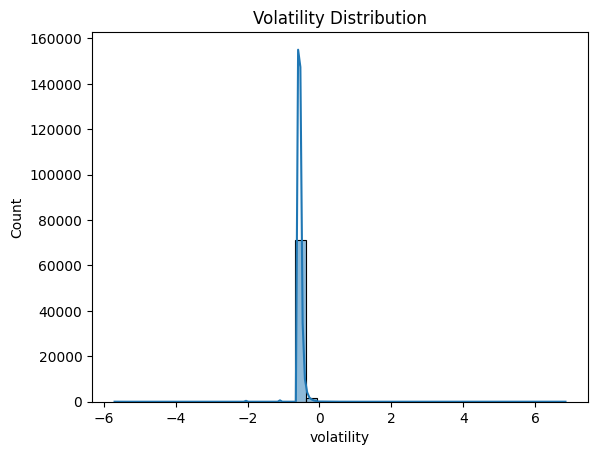

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['volatility'], bins=40, kde=True)
plt.title("Volatility Distribution")
plt.show()


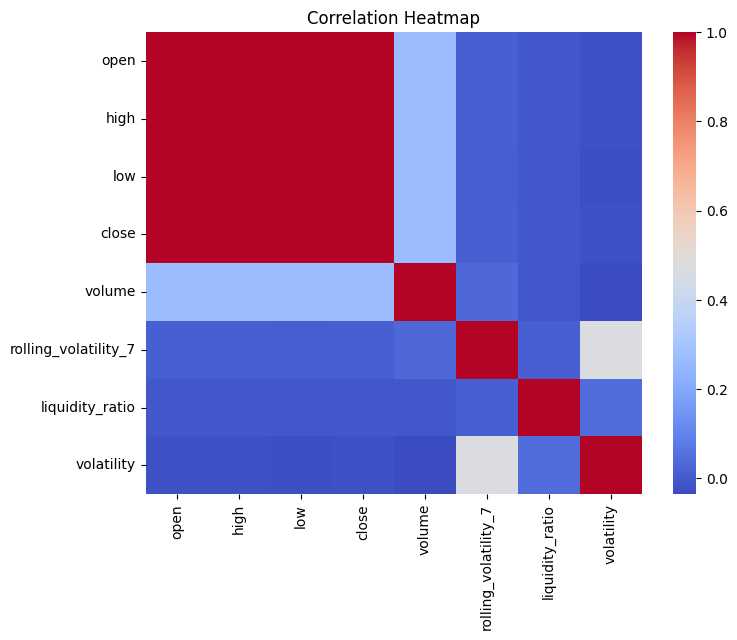

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['open','high','low','close','volume',
        'rolling_volatility_7','liquidity_ratio','volatility']].corr(),
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['open','high','low','close','volume',
        'rolling_volatility_7','liquidity_ratio']]
y = df['volatility']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 0.023276388051251783
RMSE: 0.044897088965646474
R2  : 0.8041659022869675


In [16]:
import joblib
joblib.dump(model, "volatility_model.pkl")


['volatility_model.pkl']